In [12]:
import numpy as np
import tensorflow as tf
from data.mnist import mnist_data
from data.utils import sample_and_categorize
from model.utils import clone_encoder

from train_vae import *

In [3]:
# 1. data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=3000)

In [4]:
print(samples.shape)
print(sample_labels.shape)

(3000, 28, 28, 1)
(3000,)


In [5]:
x_train = np.reshape(samples, (-1, 784))
x_train_samples = np.reshape(samples, (-1, 784))


print(x_train.shape)
print(x_train_samples.shape)

(3000, 784)
(3000, 784)


In [6]:
model_pre = VAE(latent_dim=12)

dummy_eps_input = np.zeros((len(x_train), model_pre.latent_dim))

# Fit the model. Note that the 'eps' input is ignored because it is an Input tensor.
history = model_pre.model.fit([x_train, dummy_eps_input], x_train, shuffle=True, epochs=50, batch_size=100)
# plot_learning_curve(history)

classifier = model_pre.classifier()
encodings_pretrain = model_pre.encoder.predict(x_train_samples)
image_encoder = clone_encoder(model_pre.image_encoder())

2024-02-16 13:15:00.641405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 13:15:00.651248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 13:15:00.651785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 13:15:00.653146: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Epoch 1/50
30/30 [==============================] - 1s 2ms/step - loss: 271.3541
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 191.6529
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 164.3598
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 150.3939
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 141.6918
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 134.2592
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 130.0099
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 125.6684
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 123.0069
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 120.3715
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 118.4201
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 116.6048
Epoch 13/50
30/30 [======

In [7]:
encodings_samples = model_pre.encoder.predict(x_train_samples)

/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


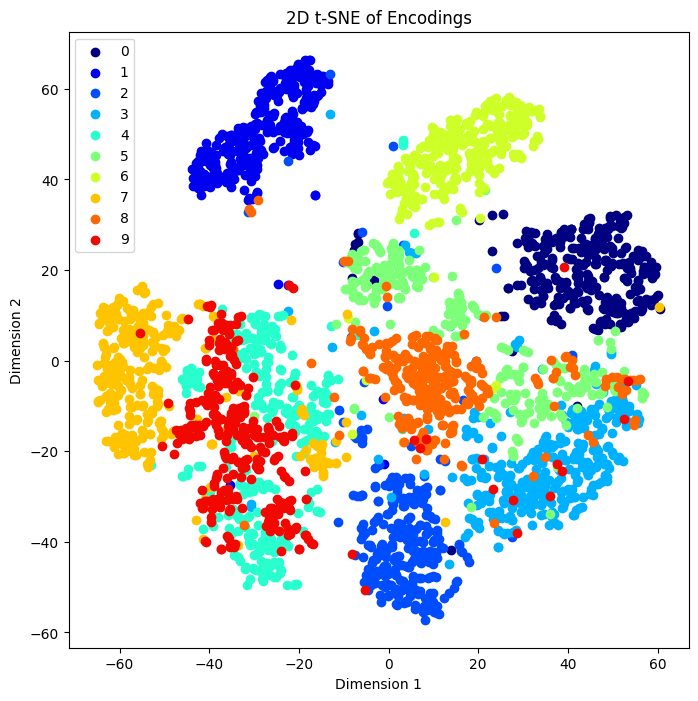

In [8]:
tsne = TSNE(n_components=2, random_state=42)
encodings_samples_2d = tsne.fit_transform(encodings_samples)
plot_encodings2d_with_labels(encodings_samples_2d, sample_labels)

In [9]:
cnn = load_model("trained_models/classifier.h5")

In [10]:
xai = xai_model(model_pre.decoder, cnn, input_shape=(12,))

In [ ]:
xai.summary()

In [46]:
class_index = 1
# Assuming `model` is your Keras model and `input_data` is the input you're interested in
input_data_np = np.random.random((1, 12))  # This is a numpy array

# Convert the numpy array to a TensorFlow tensor
input_data = tf.convert_to_tensor(input_data_np, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(input_data)  # Explicitly watch the input tensor

    # Now directly feeding `input_data` to the model, so TensorFlow automatically tracks operations
    predictions = xai(input_data, training=False)

    # Select the output for the specific class; adjust as per your model's output
    loss = tf.reduce_mean(predictions[:, class_index])

# Compute the gradient of the selected output with respect to the input
gradients = tape.gradient(loss, input_data)

print(gradients.numpy().shape)

(1, 12)


In [47]:
print(gradients)

tf.Tensor(
[[-0.00188697 -0.00973492  0.00060427  0.00260071 -0.00057484 -0.00158847
   0.00894402  0.00361517 -0.00137641  0.00238694 -0.00103873  0.0027841 ]], shape=(1, 12), dtype=float32)
